<a href="https://colab.research.google.com/github/DpD-Nightmare/Trade-analysis-with-real-time-data-and-sentiment-analysis/blob/main/13_07_2021_Final_LSTM_CNN_Time_Series_Analysis_on_AZN_GSK_VOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
# Import the important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas_datareader import data as pdr
import yfinance as yf
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
yf.pdr_override() # <== that's all it takes :-)

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
print(start, '----', end)

# download dataframe using pandas_datareader
print("\nKindly insert the Script code while asked for script name -> (i.e. PAYTM.NS): \n")
user = input("Enter the Script Name you want to analyze : ")
azn = pdr.get_data_yahoo(user, start,end)
azn_1 = pdr.get_data_yahoo('PAYTM.NS', start,end)
# azn_2 = pdr.get_data_yahoo('RDSA.L', start,end)
# azn_3 = pdr.get_data_yahoo('DGE.L', start,end)
# azn_4 = pdr.get_data_yahoo('LSEG.L', start,end)
azn.head()

2021-01-12 00:00:00 ---- 2022-01-12 05:06:34.069851

Kindly insert the Script code while asked for script name -> (i.e. PAYTM.NS): 

Enter the Script Name you want to analyze : PAYTM.NS
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-18,1950.000000,1955.000000,1560.000000,1560.800049,1560.800049,23955434
2021-11-22,1509.000000,1519.000000,1271.000000,1359.599976,1359.599976,25114710
2021-11-23,1360.000000,1525.000000,1360.000000,1494.699951,1494.699951,12954174
2021-11-24,1503.000000,1785.000000,1502.949951,1752.449951,1752.449951,21541021
2021-11-25,1766.699951,1873.699951,1711.099976,1798.750000,1798.750000,13018344


- The above dataset contains daily data and we need to Analyse the data in a    
  form of using TimeSeries so we need to convert the Date feature in to the  
  index for proper analysis result.

- We have Imported all the required script's data as per above code once So we can use them in our whole Analysis as and when required by just calling it.

In [ ]:
# Lets try to find some particular month's data from the azn set

azn['2021-11' : '2022-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-18,1950.000000,1955.000000,1560.000000,1560.800049,1560.800049,23955434
2021-11-22,1509.000000,1519.000000,1271.000000,1359.599976,1359.599976,25114710
2021-11-23,1360.000000,1525.000000,1360.000000,1494.699951,1494.699951,12954174
2021-11-24,1503.000000,1785.000000,1502.949951,1752.449951,1752.449951,21541021
2021-11-25,1766.699951,1873.699951,1711.099976,1798.750000,1798.750000,13018344
2021-11-26,1760.000000,1832.000000,1663.000000,1782.599976,1782.599976,6527364
2021-11-29,1700.000000,1810.000000,1700.000000,1736.449951,1736.449951,4564112
2021-11-30,1729.949951,1770.000000,1678.199951,1699.599976,1699.599976,2200149
2021-12-01,1715.000000,1725.000000,1629.150024,1636.699951,1636.699951,1294466


### Lets try to Visualize the trend of data using line chart for all the three scripts

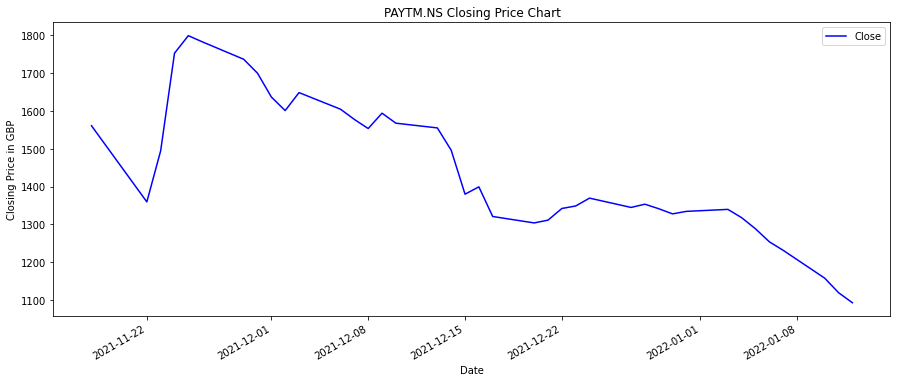

In [ ]:
# Plotting the Closing Values in to the graph
azn.Close.plot(figsize=(15,6),c='b')
plt.xlabel('Date')
plt.ylabel('Closing Price in GBP')
plt.title(f'{user} Closing Price Chart')
plt.savefig('Closing_Chart.png', dpi=300, bbox_inches='tight')
plt.legend()

- From the above three subplots of trend line we can say that,
-> Values of "AstraZeneca" is gradually increasing.
-> Values of "GlaxoSmithKline" and "GBP to USD" is having frequent fluctuation, while
-> Values of "Vodafone" is going to the down trend as compared to "AstraZeneca".

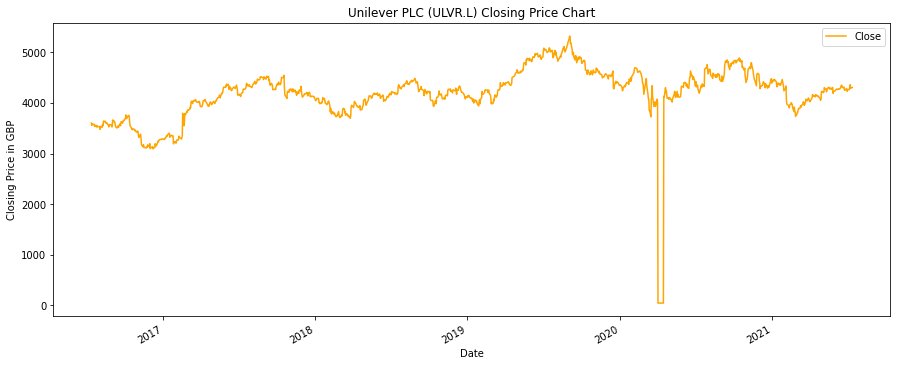

In [ ]:
# Plotting the Closing Values in to the graph for Unilever PLC (ULVR.L)
azn_1.Close.plot(figsize=(15,6),c='orange')
plt.xlabel('Date')
plt.ylabel('Closing Price in GBP')
plt.title(f'Unilever PLC (ULVR.L) Closing Price Chart')
plt.savefig('Closing_Chart_Unilever.png', dpi=300, bbox_inches='tight')
plt.legend()

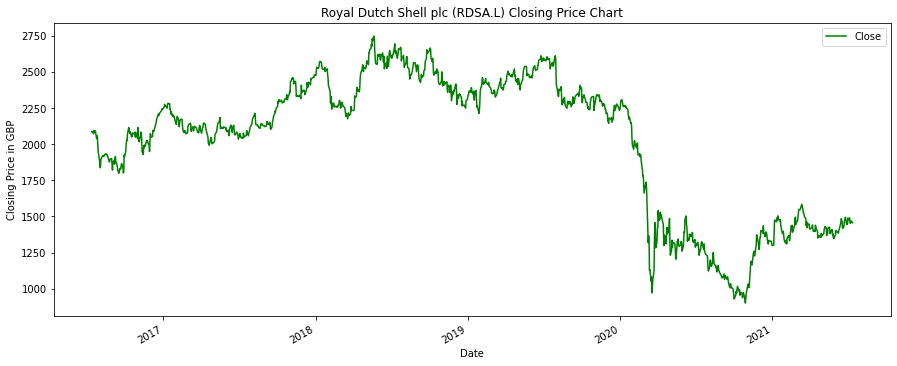

In [ ]:
# Plotting the Closing Values in to the graph for Royal Dutch Shell plc (RDSA.L)
azn_2.Close.plot(figsize=(15,6),c='green')
plt.xlabel('Date')
plt.ylabel('Closing Price in GBP')
plt.title(f'Royal Dutch Shell plc (RDSA.L) Closing Price Chart')
plt.savefig('Closing_Chart_RoyalDutch.png', dpi=300, bbox_inches='tight')
plt.legend()

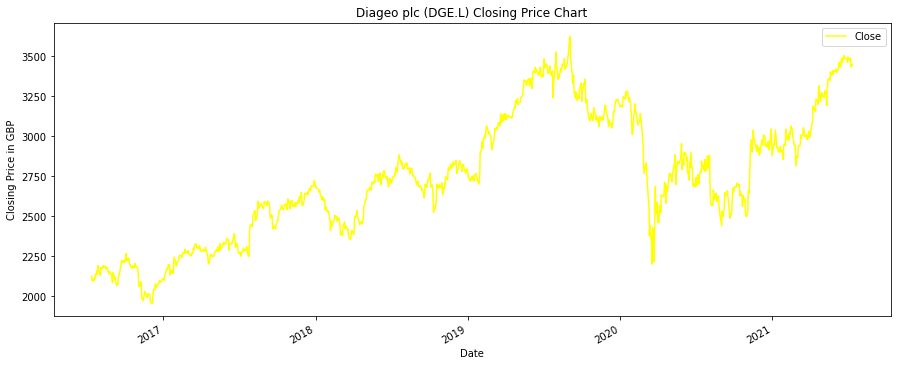

In [ ]:
# Plotting the Closing Values in to the graph for Diageo plc (DGE.L)
azn_3.Close.plot(figsize=(15,6),c='yellow')
plt.xlabel('Date')
plt.ylabel('Closing Price in GBP')
plt.title(f'Diageo plc (DGE.L) Closing Price Chart')
plt.savefig('Closing_Chart_Diageo.png', dpi=300, bbox_inches='tight')
plt.legend()

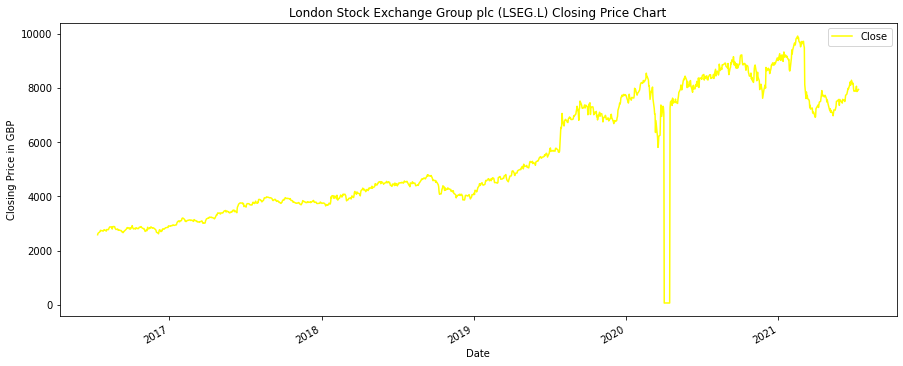

In [ ]:
# Plotting the Closing Values in to the graph for London Stock Exchange Group plc (LSEG.L)
azn_4.Close.plot(figsize=(15,6),c='yellow')
plt.xlabel('Date')
plt.ylabel('Closing Price in GBP')
plt.title('London Stock Exchange Group plc (LSEG.L) Closing Price Chart')
plt.savefig('Closing_Chart_LSEG.png', dpi=300, bbox_inches='tight')
plt.legend()

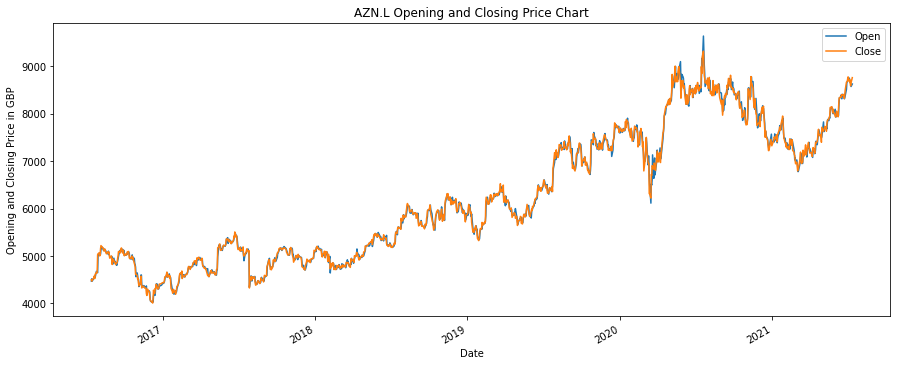

In [ ]:
# Lets do analysis on Openning and Closing for all the three scripts and GBP/USD

# Plots 1st Plot for User Entered Script
azn[['Open','Close']].plot(figsize=(15,6))    # Visualize Open and Close Price
plt.xlabel('Date')
plt.ylabel('Opening and Closing Price in GBP')
plt.title(f'{user} Opening and Closing Price Chart')
plt.legend()

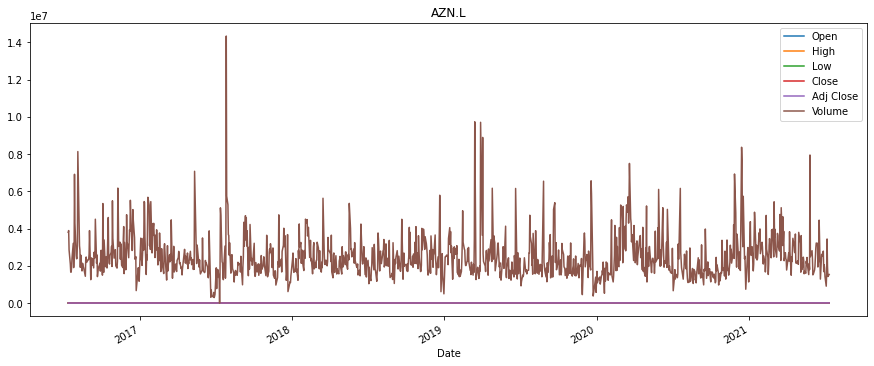

In [ ]:
# Lets, try to find the trend lines for All the features of user selected script

azn.plot(figsize=(15,6))
plt.xlabel('Date')
plt.title(f'{user}')
plt.legend()
plt.show()

- From the above trend lines of subplots, though all of the features are mixed and the Volume feature overlapped more we can not see anything clearly so we need to remove Volume from the code and again try to plot the graph with rest of the features.

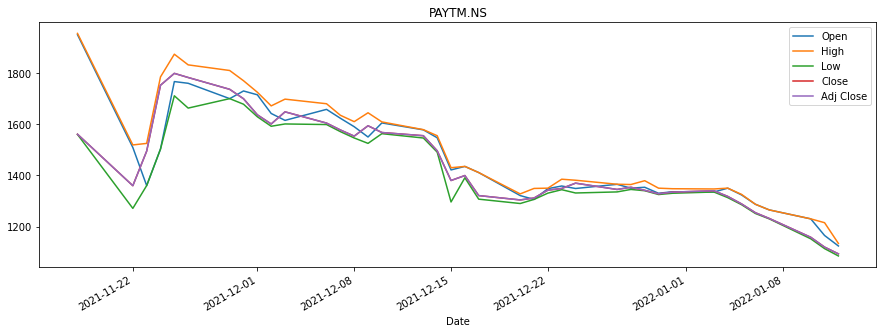

In [ ]:
# Analysis of All Columns accept Volume so that we can analyse the data clearly.

azn[['Open','High','Low','Close','Adj Close']].plot(figsize=(15,5)),
plt.xlabel('Date')
plt.title(f'{user}')
plt.legend()
plt.show()

### Resampling

#### Resampling is very important when you are given a dataset in some interval and you want to cange the interval to something else.

In [ ]:
azn.Open.resample('M').mean().head()  # We are trying to do the 'Monthly' analysis of user entered script using resampling.

Date
2016-07-31    4602.884615
2016-08-31    5078.727273
2016-09-30    4988.204545
2016-10-31    4938.666667
2016-11-30    4374.909091
Freq: M, Name: Open, dtype: float64

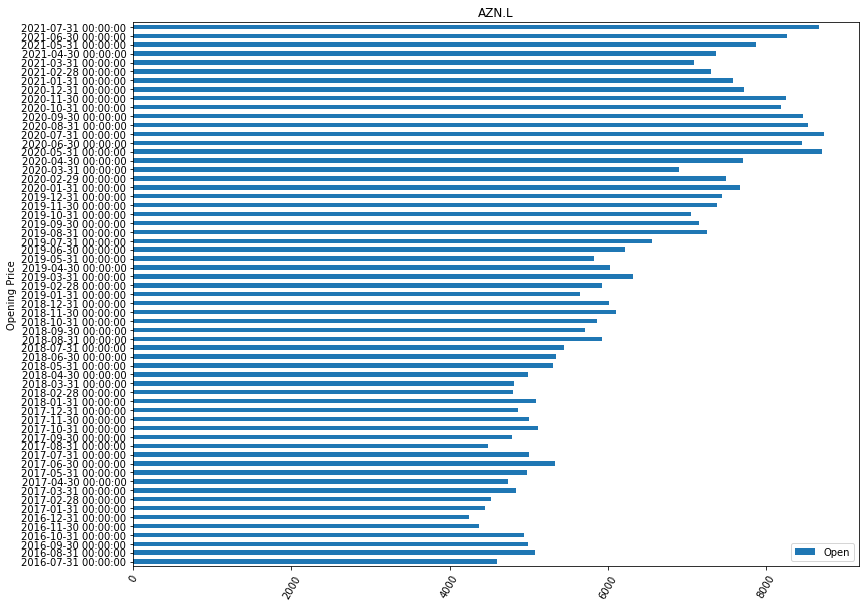

In [ ]:
# Monthly Analysis for user entered data
azn.Open.resample('M').mean().plot.barh(figsize=(13,10))
plt.ylabel('Opening Price')
plt.title(f'{user}')
plt.xticks(rotation=60)
plt.legend()
plt.show()

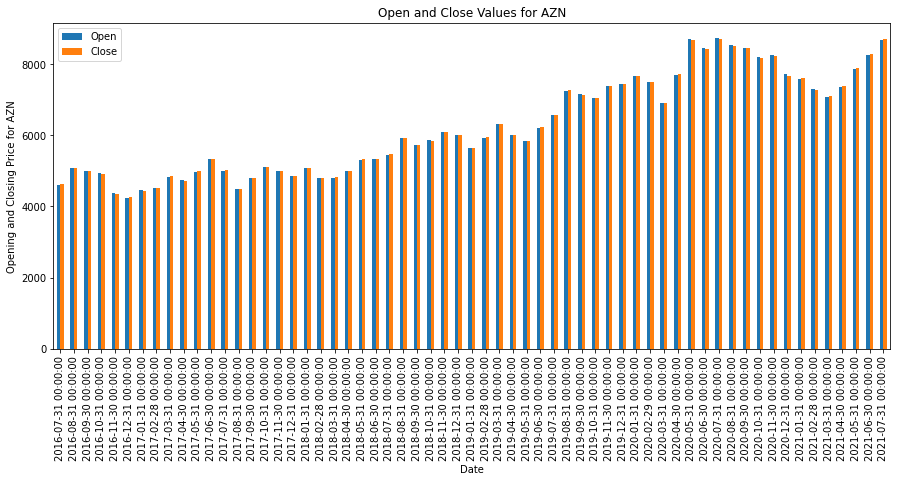

In [ ]:
# Now, Lets analyse the Open and Close values of entered Script.
azn[['Open','Close']].resample('M').mean().plot.bar(figsize=(15,6))
plt.xlabel('Date')
plt.ylabel('Opening and Closing Price for AZN')
plt.title('Open and Close Values for AZN')
plt.legend()
plt.show()

- As per the above analysis we can say that AstraZeneca PLC (AZN.L)'s prices are going higher and higher or we can say that its having gradually up trend from last 5 years of data.

- The best reason for the positive trend in the data of AstraZeneca PLC (AZN.L) is the COVID-19 Pendamic.

- It has a portfolio of products for major diseases in areas including oncology, cardiovascular, gastrointestinal, infection, neuroscience, respiratory, and inflammation. It is perhaps best known for its involvement in developing the Oxford-AstraZeneca COVID-19 vaccine.

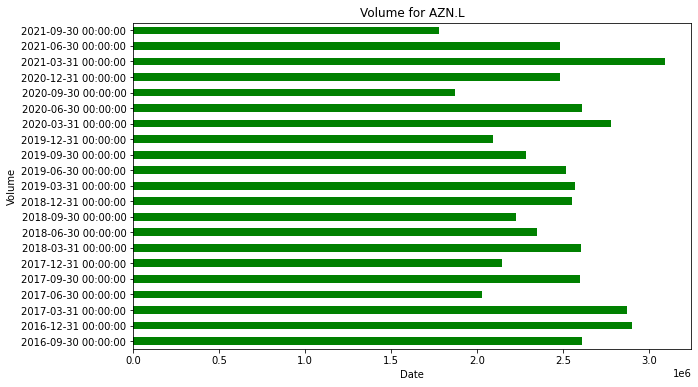

In [ ]:
# Here we are looking into the Quarterly Volume analysis for entered Script.

azn.Volume.resample('Q').mean().plot.barh(figsize=(10,6), color='green')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title(f'Volume for {user}')
plt.show()

- As per the above AZN.L Volume graph it is clearly stated that the Lowest volume of AZN was recorded in hte Q3 of 2020 while the maximum volume has been noticed in the Q1 of 2021.

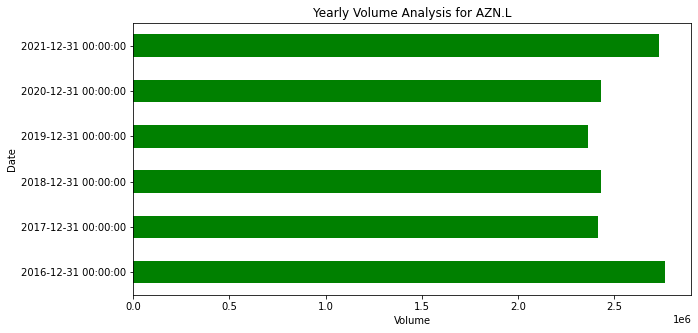

In [ ]:
# Here we are looking into the yearly volume analysis for entered Script.

azn.Volume.resample('Y').mean().plot.barh(figsize=(10,5), color='green')
plt.xlabel('Volume')
plt.ylabel('Date')
plt.title(f'Yearly Volume Analysis for {user}')
plt.show()

- As per the yearly volume graph above, AZN.L has shown the almost matched volumed which was recorded in the year 2016 nearly abount 2.7 M

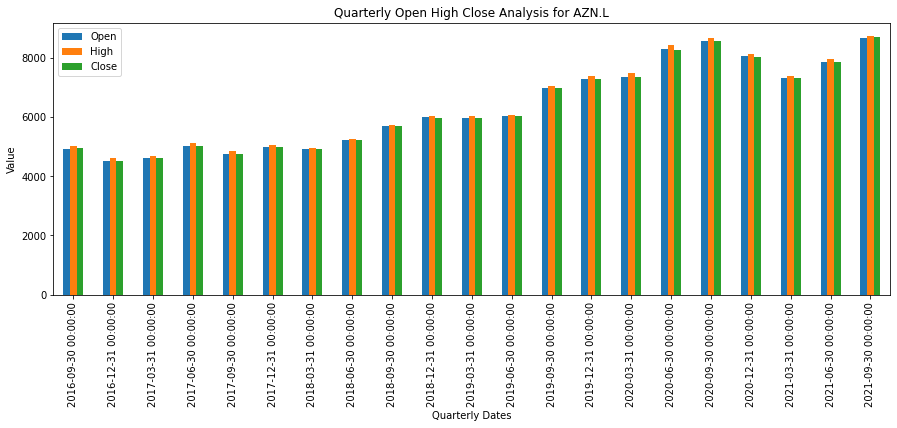

In [ ]:
# Quarterly Analysing the Highest, Open and Close Values of enteres Script.

azn[['Open','High','Close']].resample('Q').mean().plot(kind='bar',figsize=(15,5))
plt.xlabel('Quarterly Dates')
plt.ylabel('Value')
plt.title(f'Quarterly Open High Close Analysis for {user}')
plt.show()

- As per the above data we can say that the heighest growth of Script was made in the Q3 of 2020.

Above Analysis shows the drastical change in the price of the above share price index over the period from January 2020 to May 2021. The price index remained pretty steady in the early weeks of the crisis but saw a sharp decline in the weeks following the announcement of a lockdown in Northern Italy and fell to its lowest point in the week following the announcement of social
distancing in the UK (down nearly 30% to 40% from the start of January 2020).

- The change in the share price of all firms listed on the London Stock
Exchange relative to the FTSE All-Share index between 2 January and 20 May 2020. The industries that have been hardest hit include tourism and leisure (which includes air travel), retailers (excluding food and drug retailers) and some large manufacturing industries.

- At the other end of the spectrum some industries have outperformed the market, including food and drug manufacturers and retailers, utilities, high tech manufacturing and tobacco. Unsurprisingly, firms in medical and
biotech research have also outperformed the market (increasing by 6% compared to the overall decline of 21%).

#Moving Average

-- In statistics, generally a moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a moving mean (MM) or rolling mean and is a type of finite impulse response filter

-- Given a series of numbers and a fixed subset size, the first element of the moving average is obtained by taking the average of the initial fixed subset of the number series. Then the subset is modified by "shifting forward"; that is, excluding the first number of the series and including the next value in the subset.

-- A moving average is commonly used with time series data like we analyse to smooth out short-term fluctuations and highlight longer-term trends or cycles. The threshold between short-term and long-term depends on the application, and the parameters of the moving average will be set accordingly.

In [ ]:
# Calculate Moving Averages for 10 days, 20 days and 50 days for entered script
aznma = pd.DataFrame(azn['Adj Close']).copy()
MA_days_list = [10, 20, 50]

for days in MA_days_list:
    column_name = f"{days}_days_MA"
    aznma[column_name] = aznma['Adj Close'].rolling(days).mean()

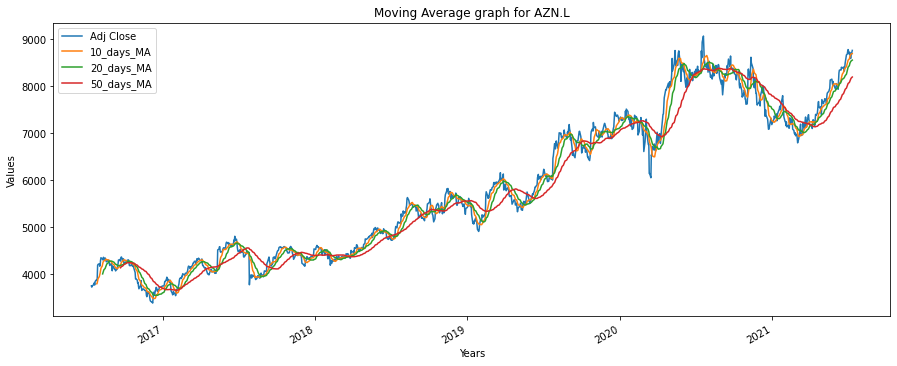

In [ ]:
# Plotting Calculated Moving Averages for entered script
aznma[['Adj Close', '10_days_MA', '20_days_MA', '50_days_MA']].plot(figsize=(15,6),legend=True)
plt.title(f'Moving Average graph for {user}')
plt.xlabel('Years')
plt.ylabel('Values')
plt.show()

-- Above diagrams of Moving averages for AZN.L has been displayed on the bases of Adj Close columns.

In [ ]:
# Lets find the percent change for each day using pct_change for entered script.
aznma['Daily_Return'] = aznma['Adj Close'].pct_change()

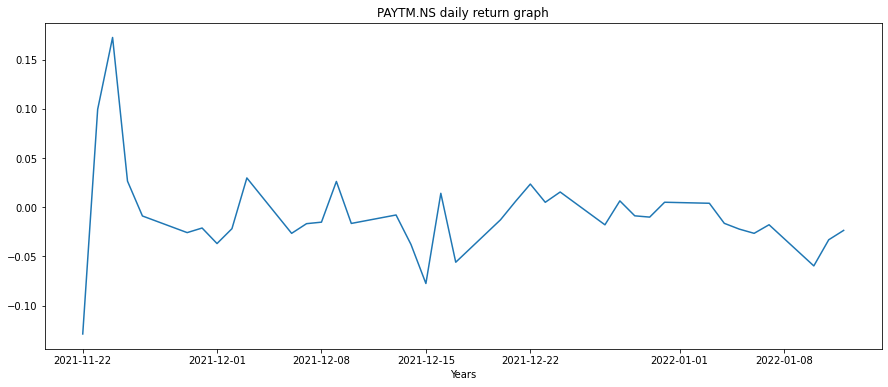

In [ ]:
# Now, Ploting the daily return percentage
plt.figure(figsize=(15,6))
plt.plot(aznma['Daily_Return'])
plt.title(f'{user} daily return graph')
plt.xlabel('Years')
plt.show()

# Preparation for Model Data

- Creting a new Dataframe which stores the data of only "Close" column.

In [ ]:
# Create a new df with only the Close column
azndata = azn.filter(['Close'])
azndata.shape

(1264, 1)

In [ ]:
dataset = azndata.values
training_data_len = int(np.ceil(len(dataset) * .90))
training_data_len

1138

- Lets Scale the data for better and accurate analysis further

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(azndata)
scaled_data

array([[0.09260305],
       [0.08705063],
       [0.0931677 ],
       ...,
       [0.86241295],
       [0.87351779],
       [0.89497459]])

#Creating Training Set

In [ ]:
# Create the training data set

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.09260305, 0.08705063, 0.0931677 , 0.09787314, 0.09909656,
       0.10766046, 0.09721438, 0.11396574, 0.12168267, 0.1188594 ,
       0.12855261, 0.19198193, 0.1959345 , 0.19932242, 0.18727649,
       0.18991154, 0.21569735, 0.22830792, 0.2226614 , 0.22021457,
       0.21701487, 0.21720309, 0.2066629 , 0.21400339, 0.20515716,
       0.19988707, 0.19555807, 0.19781668, 0.20402786, 0.19856955,
       0.20195746, 0.18897045, 0.17843027, 0.18727649, 0.16977226,
       0.15320911, 0.17532468, 0.16864295, 0.1616789 , 0.16374929,
       0.16177301, 0.15283267, 0.16017316, 0.16186712, 0.17786561,
       0.18577075, 0.20478073, 0.20176925, 0.20798043, 0.19932242,
       0.21645022, 0.21889704, 0.2055336 , 0.19781668, 0.2098626 ,
       0.19179371, 0.18765293, 0.19461698, 0.1916055 , 0.19480519])]
[0.1917937135328439]

[array([0.09260305, 0.08705063, 0.0931677 , 0.09787314, 0.09909656,
       0.10766046, 0.09721438, 0.11396574, 0.12168267, 0.1188594 ,
       0.12855261, 0.19198193, 0.195

In [ ]:
# Convert x_train & y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1078, 60, 1)

In [ ]:
1078+60

1138

#Creating Testing Set

In [ ]:
# Create the testing data set
# Create a new array containing scaled values test
test_data = scaled_data[training_data_len - 60:, :]

In [ ]:
scaled_data

array([[0.09260305],
       [0.08705063],
       [0.0931677 ],
       ...,
       [0.86241295],
       [0.87351779],
       [0.89497459]])

In [ ]:
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
x_test.shape

(126, 60, 1)

In [ ]:
126+60

186

#Lets introduce Models we are going to use for the entered script.

# LSTM  (Single Layer)

In [ ]:
# Lets import some important libraries for model fitting

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [ ]:
# Build the LSTM model (Single Layer)
lstm1 = Sequential()
lstm1.add(LSTM(128, return_sequences=False, input_shape=(x_train.shape[1], 1)))
lstm1.add(Dense(1))

# compile the model
lstm1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

In [ ]:
%time
# train the model
lstm1.fit(x_train, y_train, batch_size=1, epochs=10)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs
Epoch 1/10
1078/1078 [==============================] - 21s 18ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0332
Epoch 2/10
1078/1078 [==============================] - 19s 18ms/step - loss: 9.8494e-04 - mse: 9.8494e-04 - mae: 0.0225
Epoch 3/10
1078/1078 [==============================] - 19s 18ms/step - loss: 7.5040e-04 - mse: 7.5040e-04 - mae: 0.0200
Epoch 4/10
1078/1078 [==============================] - 19s 18ms/step - loss: 7.4225e-04 - mse: 7.4225e-04 - mae: 0.0193
Epoch 5/10
1078/1078 [==============================] - 19s 18ms/step - loss: 6.2413e-04 - mse: 6.2413e-04 - mae: 0.0179
Epoch 6/10
1078/1078 [==============================] - 19s 18ms/step - loss: 5.9855e-04 - mse: 5.9855e-04 - mae: 0.0175
Epoch 7/10
1078/1078 [==============================] - 19s 18ms/step - loss: 5.8168e-04 - mse: 5.8168e-04 - mae: 0.0173
Epoch 8/10
1078/1078 [==============================] - 19s 17ms/step - loss: 6.2636e-04 - mse: 6

In [ ]:
metrics = pd.DataFrame(lstm1.history.history)
metrics

,loss,mse,mae
0,0.002255,0.002255,0.033165
1,0.000985,0.000985,0.022544
2,0.000750,0.000750,0.020038
3,0.000742,0.000742,0.019348
4,0.000624,0.000624,0.017853
5,0.000599,0.000599,0.017535
6,0.000582,0.000582,0.017312
7,0.000626,0.000626,0.017910
8,0.000564,0.000564,0.016780
9,0.000544,0.000544,0.016478


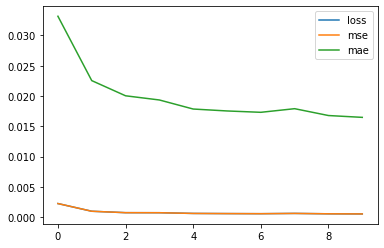

In [ ]:
metrics.plot()

In [ ]:
y_pred = lstm1.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

In [ ]:
# Save the model
lstm1.save("lstm1")

INFO:tensorflow:Assets written to: lstm1/assets


INFO:tensorflow:Assets written to: lstm1/assets


In [ ]:
lstm1.save_weights("lstm1_weights")

In [ ]:
# Side by Side Comparision
result = pd.DataFrame({'Actual Close':y_test[-1].flatten(), 'Predicted Close':y_pred[-1].flatten()})
result

,Actual Close,Predicted Close
0,8762.0,8589.308594


In [ ]:
# Lets find MDA for our further reference.

#mda = (actual:np.ndarray,predicted:np.ndarray)

def mda(actual: np.ndarray, predicted: np.ndarray):
  """ Mean Directional Accuracy """
  return np.mean((np.sign(y_test[1:] - y_test[:-1]) == np.sign(y_pred[1:] - y_pred[:-1])).astype(int))

mda(y_test, y_pred)

0.568

In [ ]:
# Get the various errors (MSE, RMSE, MAE, MAPE)
errors = y_pred - y_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()
mape = np.mean(np.abs(((y_test - y_pred)/y_test)))*100

print(f" MSE   : {mse}\n RMSE  : {rmse}\n MAE   : {mae}\n MAPE  : {mape}")

 MSE   : 11173.298762595843
 RMSE  : 105.70382567625376
 MAE   : 84.32437763516864
 MAPE  : 1.1002599729851854


In [ ]:
acc_lstm1 = explained_variance_score(y_test, y_pred)
print(f"Accuracy of the Single layer LSTM is : {acc_lstm1*100} %")

Accuracy of the Single layer LSTM is : 96.54311126129168 %


In [ ]:
# Plot the data
train = azndata[:training_data_len]
valid = azndata[training_data_len:]
valid['Predictions'] = y_pred

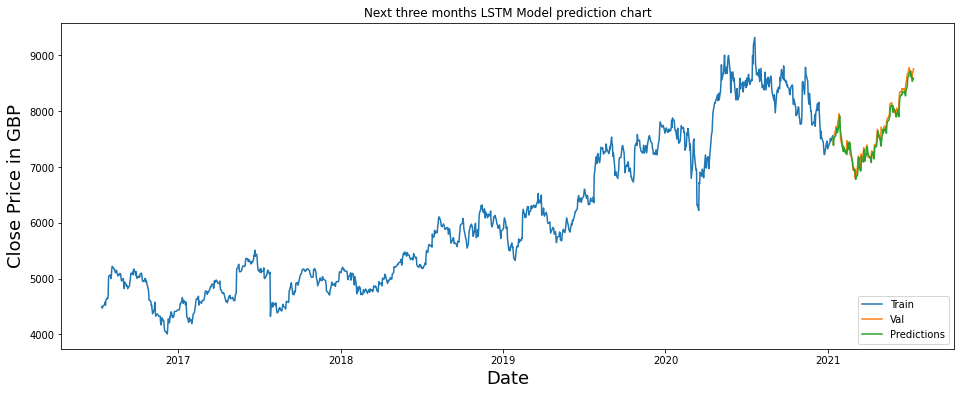

In [ ]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Next three months LSTM Model prediction chart')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in GBP', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
lstm1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


# LSTM  (Multi Layer / Deep LSTM)

In [ ]:
# create and fit the Deep LSTM network (Multilayer)
lstm2 = Sequential()
lstm2.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
lstm2.add(LSTM(64, return_sequences=True))
lstm2.add(LSTM(32, return_sequences=True))
lstm2.add(LSTM(16, return_sequences=False))
lstm2.add(Dense(4))
lstm2.add(Dense(1))

# compile the model
lstm2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

In [ ]:
%time
# Model Training for LSTM
list_t = np.arange(1,11)   # Provide the training 10 times to the model
accuracy = []

for i in list_t:
  # train the model
  lstm2.fit(x_train, y_train, batch_size=10, epochs=i)
  # Get the models predicted price values
  y_pred = lstm2.predict(x_test)
  y_pred = scaler.inverse_transform(y_pred)
  temp = explained_variance_score(y_test, y_pred)
  print('Provided Training',i," time, Accuracy Score is",temp)
  print("\n\n")
  accuracy.append(temp)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs
108/108 [==============================] - 21s 129ms/step - loss: 0.0121 - mse: 0.0121 - mae: 0.0697
Provided Training 1  time, Accuracy Score is 0.7057101161685583



Epoch 1/2
108/108 [==============================] - 13s 124ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0429
Epoch 2/2
108/108 [==============================] - 14s 129ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0432
Provided Training 2  time, Accuracy Score is 0.7740683538590512



Epoch 1/3
108/108 [==============================] - 13s 118ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0398
Epoch 2/3
108/108 [==============================] - 13s 118ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0377
Epoch 3/3
108/108 [==============================] - 13s 117ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0349
Provided Training 3  time, Accuracy Score is 0.8322848074061041



Epoch 1/4
108/108 [==============================] - 13s 117ms/step - loss: 0.0

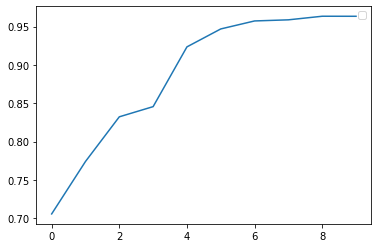

In [ ]:
plt.plot(accuracy)
plt.legend()

In [ ]:
# Get the models predicted price values
y_pred = lstm2.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

In [ ]:
# Saving the model
lstm2.save("lstm2")
# Saving the weights of model
lstm2.save_weights("lstm2_weights")

INFO:tensorflow:Assets written to: lstm2/assets


INFO:tensorflow:Assets written to: lstm2/assets


In [ ]:
# Side by Side Comparision
result = pd.DataFrame({'Actual Close':y_test[-1].flatten(), 'Predicted Close':y_pred[-1].flatten()})
result

,Actual Close,Predicted Close
0,8762.0,8606.125


In [ ]:
#mda = (actual:np.ndarray,predicted:np.ndarray)

def mda(actual: np.ndarray, predicted: np.ndarray):
  """ Mean Directional Accuracy """
  return np.mean((np.sign(y_test[1:] - y_test[:-1]) == np.sign(y_pred[1:] - y_pred[:-1])).astype(int))

mda(y_test, y_pred)

0.568

In [ ]:
# Get the various errors (MSE, RMSE, MAE, MAPE)
errors = y_pred - y_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()
mape = np.mean(np.abs(((y_test - y_pred)/y_test)))*100

print(f" MSE   : {mse}\n RMSE  : {rmse}\n MAE   : {mae}\n MAPE  : {mape}")

 MSE   : 9846.771581082117
 RMSE  : 99.23090033392883
 MAE   : 79.71761067708333
 MAPE  : 1.0475211133107947


In [ ]:
acc_lstm2 = explained_variance_score(y_test, y_pred)
print(f"Accuracy of the Deep LSTM Model is : {acc_lstm2*100} %")

Accuracy of the Deep LSTM Model is : 96.33416896217851 %


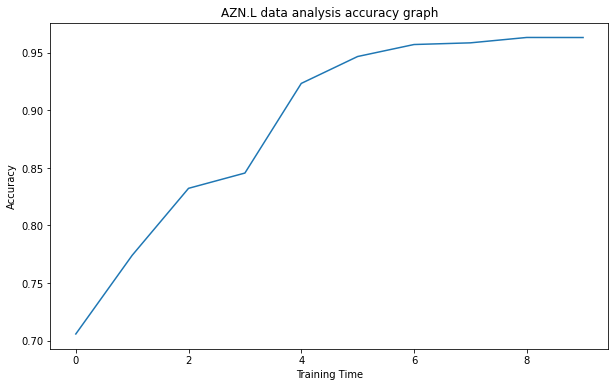

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(accuracy)
plt.title(f'{user} data analysis accuracy graph')
plt.xlabel('Training Time')
plt.ylabel('Accuracy')
plt.show()

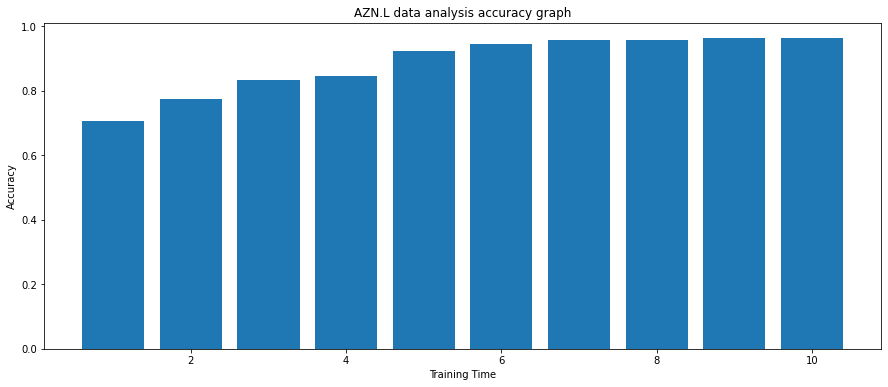

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(list_t,accuracy)
plt.title(f'{user} data analysis accuracy graph')
plt.xlabel('Training Time')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Plot the data
train = azndata[:training_data_len]
valid = azndata[training_data_len:]
valid['Predictions'] = y_pred

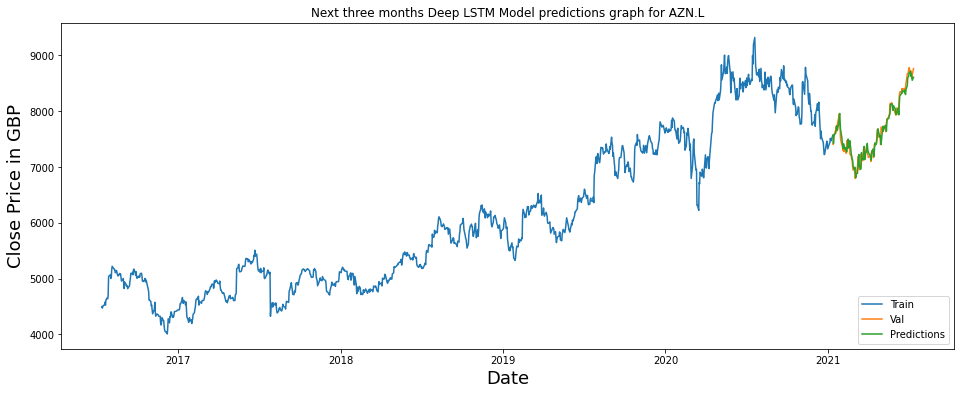

In [ ]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title(f'Next three months Deep LSTM Model predictions graph for {user}')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in GBP', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
lstm2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 128)           66560     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 64)            49408     
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 32)            12416     
_________________________________________________________________
lstm_4 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 131,593
Trainable params: 131,593
Non-trainable params: 0
________________________________________________

# CNN (Single Layer)

In [ ]:
# Lets fit the same entered script data on CNN

In [ ]:
# Importing the libraries
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [ ]:
# defining CNN model (Single Layer)
cnn1 = Sequential()
cnn1.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(x_train.shape[1], 1)))
cnn1.add(MaxPooling1D(pool_size=2))
cnn1.add(Flatten())
cnn1.add(Dense(32, activation='relu'))
cnn1.add(Dense(1))

# Compiling the CNN model
cnn1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

In [ ]:
%time
# train the CNN model
cnn1.fit(x_train, y_train, batch_size=1, epochs=20)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs
Epoch 1/20
1078/1078 [==============================] - 3s 2ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0522
Epoch 2/20
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0387
Epoch 3/20
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0365
Epoch 4/20
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0323
Epoch 5/20
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0325
Epoch 6/20
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0326
Epoch 7/20
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0309
Epoch 8/20
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0296
Epoch 9/20
1078/1078 [===========================

In [ ]:
metrics = pd.DataFrame(cnn1.history.history)
metrics

,loss,mse,mae
0,0.005179,0.005179,0.052177
1,0.002824,0.002824,0.038685
2,0.002564,0.002564,0.036501
3,0.001960,0.001960,0.032295
4,0.001972,0.001972,0.032463
5,0.002021,0.002021,0.032640
6,0.001819,0.001819,0.030926
7,0.001640,0.001640,0.029647
8,0.001583,0.001583,0.029339
9,0.001507,0.001507,0.027714


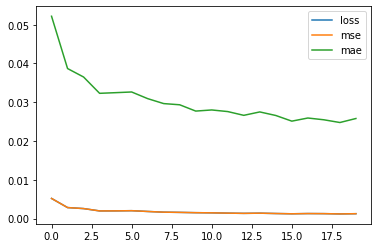

In [ ]:
metrics.plot()

In [ ]:
# Get the models predicted price values
y_pred = cnn1.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

In [ ]:
# Saving the model
cnn1.save("cnn1")
# Saving the weights of model
cnn1.save_weights("cnn1_weights")

INFO:tensorflow:Assets written to: cnn1/assets


INFO:tensorflow:Assets written to: cnn1/assets


In [ ]:
# Side by Side Comparision
result = pd.DataFrame({'Actual Close':y_test[-1].flatten(), 'Predicted Close':y_pred[-1].flatten()})
result

,Actual Close,Predicted Close
0,8762.0,8558.234375


In [ ]:
#mda = (actual:np.ndarray,predicted:np.ndarray)

def mda(actual: np.ndarray, predicted: np.ndarray):
  """ Mean Directional Accuracy """
  return np.mean((np.sign(y_test[1:] - y_test[:-1]) == np.sign(y_pred[1:] - y_pred[:-1])).astype(int))

mda_acc = mda(y_test, y_pred)
mda_acc

0.464

In [ ]:
# Get the various errors (MSE, RMSE, MAE, MAPE)
errors = y_pred - y_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()
mape = np.mean(np.abs(((y_test - y_pred)/y_test)))*100

print(f" MSE   : {mse}\n RMSE  : {rmse}\n MAE   : {mae}\n MDA   : {mda(y_test,y_pred)}\n MAPE  : {mape}")

 MSE   : 32354.76677606598
 RMSE  : 179.87430827126474
 MAE   : 151.96231708829364
 MDA   : 0.464
 MAPE  : 1.9711743837985254


In [ ]:
acc_cnn1 = explained_variance_score(y_test, y_pred)
print(f"Accuracy of the Single layer CNN Model is : {acc_cnn1*100} %")

Accuracy of the Single layer CNN Model is : 90.05910539702586 %


In [ ]:
# Plot the data
train = azndata[:training_data_len]
valid = azndata[training_data_len:]
valid['Predictions'] = y_pred

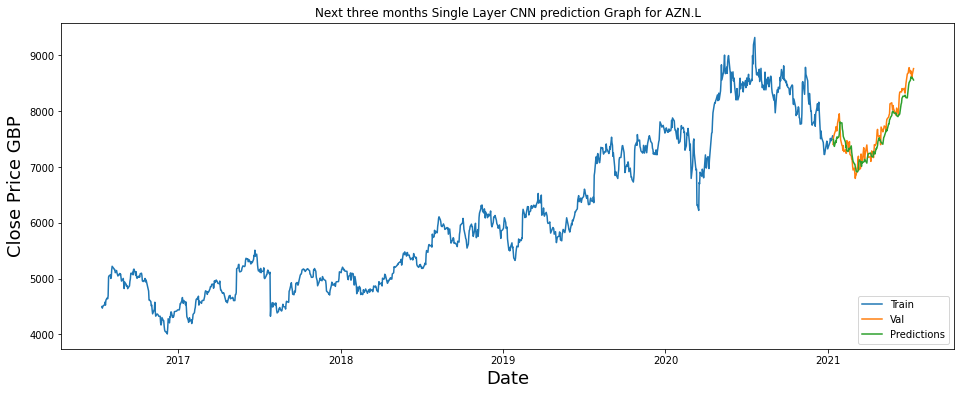

In [ ]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title(f'Next three months Single Layer CNN prediction Graph for {user}')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price GBP', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
cnn1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_6 (ModuleWrap (None, 59, 128)           384       
_________________________________________________________________
module_wrapper_7 (ModuleWrap (None, 29, 128)           0         
_________________________________________________________________
module_wrapper_8 (ModuleWrap (None, 3712)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                118816    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 119,233
Trainable params: 119,233
Non-trainable params: 0
_________________________________________________________________


# CNN  (Multi Layer / Deep CNN)

In [ ]:
# defining CNN model (Single Layer)
cnn2 = Sequential()
cnn2.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(x_train.shape[1], 1)))
cnn2.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
cnn2.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
cnn2.add(Conv1D(filters=16, kernel_size=2, activation='relu'))
cnn2.add(MaxPooling1D(pool_size=2))
cnn2.add(Flatten())
cnn2.add(Dense(32, activation='relu'))
cnn2.add(Dense(1))

# Compiling the multi layer CNN model.
cnn2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

In [ ]:
%time
# Model Training for LSTM
list_t = np.arange(1,11)   # Provide the training 10 times to the model
accuracy = []

for i in list_t:
  # train the CNN model
  cnn2.fit(x_train, y_train, batch_size=1, epochs=i)
  # Get the models predicted price values
  y_pred = cnn2.predict(x_test)
  y_pred = scaler.inverse_transform(y_pred)
  temp = explained_variance_score(y_test, y_pred)
  print('Provided Training ',i,"time, Accuracy Score is",temp)
  accuracy.append(temp)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
1078/1078 [==============================] - 3s 2ms/step - loss: 0.0075 - mse: 0.0075 - mae: 0.0592
Provided Training  1 time, Accuracy Score is 0.745119204065706
Epoch 1/2
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0431
Epoch 2/2
1078/1078 [==============================] - 3s 2ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0379
Provided Training  2 time, Accuracy Score is 0.819994996291387
Epoch 1/3
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0370
Epoch 2/3
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0336
Epoch 3/3
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0325
Provided Training  3 time, Accuracy Score is 0.9086607713552913
Epoch 1/4
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0023 - mse: 0.0023 

In [ ]:
# Saving the model
cnn2.save("cnn2")
# Saving the weights of model
cnn2.save_weights("cnn2_weights")

INFO:tensorflow:Assets written to: cnn2/assets


INFO:tensorflow:Assets written to: cnn2/assets


In [ ]:
# Side by Side Comparision
result = pd.DataFrame({'Actual':y_test[-1].flatten(), 'Prediction':y_pred[-1].flatten()})
result

,Actual,Prediction
0,8762.0,8405.435547


In [ ]:
#mda = (actual:np.ndarray,predicted:np.ndarray)

def mda(actual: np.ndarray, predicted: np.ndarray):
  """ Mean Directional Accuracy """
  return np.mean((np.sign(y_test[1:] - y_test[:-1]) == np.sign(y_pred[1:] - y_pred[:-1])).astype(int))

mda(y_test, y_pred)

0.504

In [ ]:
# Get the various errors (MSE, RMSE, MAE, MAPE)
errors = y_pred - y_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()
mape = np.mean(np.abs(((y_test - y_pred)/y_test)))*100

print(f" MSE   : {mse}\n RMSE  : {rmse}\n MAE   : {mae}\n MAPE  : {mape}")

 MSE   : 32533.30499599472
 RMSE  : 180.36991155953567
 MAE   : 142.52077907986111
 MAPE  : 1.8046176985465128


In [ ]:
acc_cnn2 = explained_variance_score(y_test, y_pred)
print(f"Accuracy of the Deep CNN Model is : {acc_cnn2*100} %")

Accuracy of the Deep CNN Model is : 92.88105205041465 %


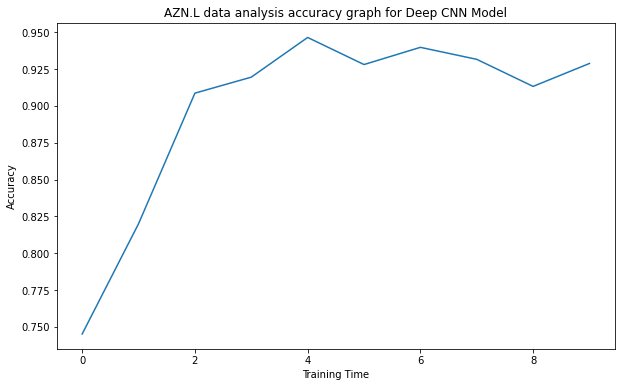

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(accuracy)
plt.title(f'{user} data analysis accuracy graph for Deep CNN Model')
plt.xlabel('Training Time')
plt.ylabel('Accuracy')
plt.show()

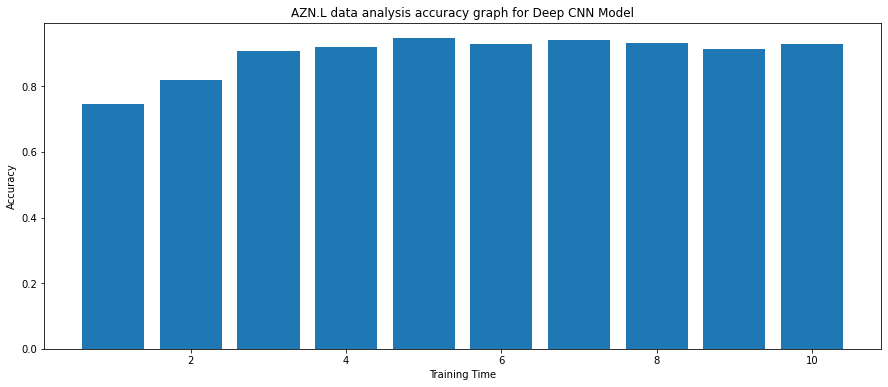

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(list_t,accuracy)
plt.title(f'{user} data analysis accuracy graph for Deep CNN Model')
plt.xlabel('Training Time')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Plot the data
train = azndata[:training_data_len]
valid = azndata[training_data_len:]
valid['Predictions'] = y_pred

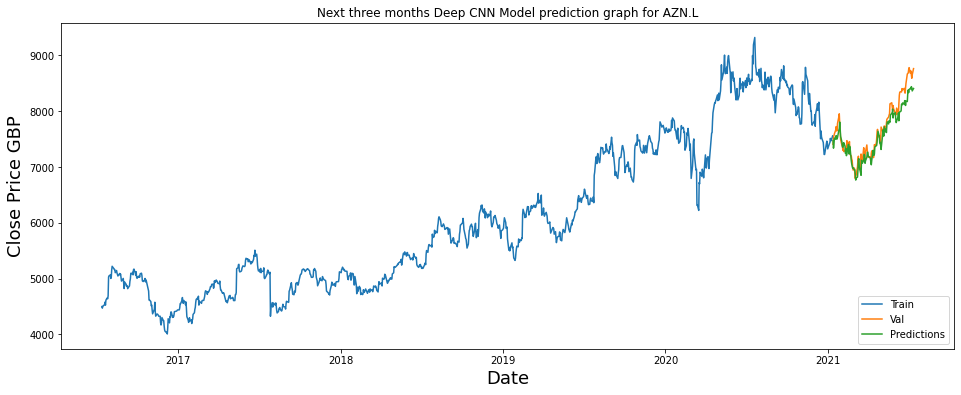

In [ ]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title(f'Next three months Deep CNN Model prediction graph for {user}')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price GBP', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
cnn2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_9 (ModuleWrap (None, 59, 64)            192       
_________________________________________________________________
module_wrapper_10 (ModuleWra (None, 58, 32)            4128      
_________________________________________________________________
module_wrapper_11 (ModuleWra (None, 57, 32)            2080      
_________________________________________________________________
module_wrapper_12 (ModuleWra (None, 56, 16)            1040      
_________________________________________________________________
module_wrapper_13 (ModuleWra (None, 28, 16)            0         
_________________________________________________________________
module_wrapper_14 (ModuleWra (None, 448)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)               

# Comparision of Accuracy from all the Models

 Single Layer LSTM : 0.9654311126129168
 Deep LSTM         : 0.9633416896217851
 Single Layer CNN  : 0.9005910539702586
 Deep CNN          : 0.9288105205041466


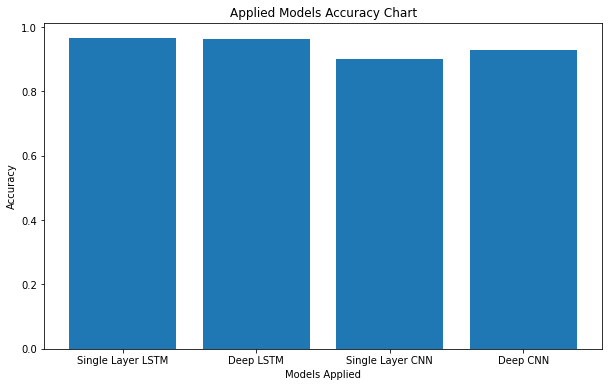

In [ ]:
list_accuracy = ['Single Layer LSTM','Deep LSTM','Single Layer CNN','Deep CNN']
accu = [acc_lstm1,acc_lstm2,acc_cnn1,acc_cnn2]

print(f" Single Layer LSTM : {acc_lstm1}\n Deep LSTM         : {acc_lstm2}\n Single Layer CNN  : {acc_cnn1}\n Deep CNN          : {acc_cnn2}")
plt.figure(figsize=(10,6))
plt.bar(list_accuracy,accu)
plt.xlabel('Models Applied')
plt.ylabel('Accuracy')
plt.title('Applied Models Accuracy Chart')
plt.show()

The gains achieved going from a LSTM model to convolutional models are only a few percent (if any). So these more complex approaches may perform very perfectly worth while on this problem, as there was no way to know without trying, and these models could be helpful for other problems which are related too.